In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as cx
import os

In [2]:
# Load the data
mortality_state = gpd.read_file("./output_shpfile/mortality_perState_perYear_shp/mortality_perDistrict_perMonth_shp.shp")
mortality_state.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   lgd_sta_id  26 non-null     object  
 1   lgd_sta_na  26 non-null     object  
 2   pc11_st_id  26 non-null     object  
 3   pc11_st_na  26 non-null     object  
 4   deaths      26 non-null     float64 
 5   year        26 non-null     float64 
 6   geometry    26 non-null     geometry
dtypes: float64(2), geometry(1), object(4)
memory usage: 1.5+ KB


In [3]:
mortality_state["year"] = mortality_state["year"].astype(int)
mortality_state["deaths"] = mortality_state["deaths"].astype(int)
mortality_state = mortality_state[mortality_state["year"].isin([2018, 2019, 2020, 2021])]
mortality_state

,lgd_sta_id,lgd_sta_na,pc11_st_id,pc11_st_na,deaths,year,geometry
0,09,uttar pradesh,09,uttar pradesh,771383,2019,"MULTIPOLYGON (((78.58008 25.18957, 78.58099 25..."
1,09,uttar pradesh,09,uttar pradesh,791485,2020,"MULTIPOLYGON (((78.58008 25.18957, 78.58099 25..."
2,09,uttar pradesh,09,uttar pradesh,333878,2021,"MULTIPOLYGON (((78.58008 25.18957, 78.58099 25..."
3,10,bihar,10,bihar,182921,2018,"MULTIPOLYGON (((84.51003 24.25944, 84.50918 24..."
4,10,bihar,10,bihar,351274,2019,"MULTIPOLYGON (((84.51003 24.25944, 84.50918 24..."
5,10,bihar,10,bihar,387429,2020,"MULTIPOLYGON (((84.51003 24.25944, 84.50918 24..."
6,10,bihar,10,bihar,215746,2021,"MULTIPOLYGON (((84.51003 24.25944, 84.50918 24..."
7,23,madhya pradesh,23,madhya pradesh,407123,2018,"MULTIPOLYGON (((76.78783 21.54013, 76.78554 21..."
8,23,madhya pradesh,23,madhya pradesh,449740,2019,"MULTIPOLYGON (((76.78783 21.54013, 76.78554 21..."
9,23,madhya pradesh,23,madhya pradesh,460691,2020,"MULTIPOLYGON (((76.78783 21.54013, 76.78554 21..."


In [4]:
utter_pradesh_2018 = mortality_state.iloc[0].copy()
utter_pradesh_2018["deaths"] = 751281
utter_pradesh_2018["year"] = 2018
mortality_state = pd.concat([mortality_state, utter_pradesh_2018.to_frame().T], ignore_index=True)
mortality_state

,lgd_sta_id,lgd_sta_na,pc11_st_id,pc11_st_na,deaths,year,geometry
0,09,uttar pradesh,09,uttar pradesh,771383,2019,"MULTIPOLYGON (((78.58008 25.18957, 78.58099 25..."
1,09,uttar pradesh,09,uttar pradesh,791485,2020,"MULTIPOLYGON (((78.58008 25.18957, 78.58099 25..."
2,09,uttar pradesh,09,uttar pradesh,333878,2021,"MULTIPOLYGON (((78.58008 25.18957, 78.58099 25..."
3,10,bihar,10,bihar,182921,2018,"MULTIPOLYGON (((84.51003 24.25944, 84.50918 24..."
4,10,bihar,10,bihar,351274,2019,"MULTIPOLYGON (((84.51003 24.25944, 84.50918 24..."
5,10,bihar,10,bihar,387429,2020,"MULTIPOLYGON (((84.51003 24.25944, 84.50918 24..."
6,10,bihar,10,bihar,215746,2021,"MULTIPOLYGON (((84.51003 24.25944, 84.50918 24..."
7,23,madhya pradesh,23,madhya pradesh,407123,2018,"MULTIPOLYGON (((76.78783 21.54013, 76.78554 21..."
8,23,madhya pradesh,23,madhya pradesh,449740,2019,"MULTIPOLYGON (((76.78783 21.54013, 76.78554 21..."
9,23,madhya pradesh,23,madhya pradesh,460691,2020,"MULTIPOLYGON (((76.78783 21.54013, 76.78554 21..."


In [5]:
mortality_state.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   lgd_sta_id  24 non-null     object  
 1   lgd_sta_na  24 non-null     object  
 2   pc11_st_id  24 non-null     object  
 3   pc11_st_na  24 non-null     object  
 4   deaths      24 non-null     object  
 5   year        24 non-null     object  
 6   geometry    24 non-null     geometry
dtypes: geometry(1), object(6)
memory usage: 1.4+ KB


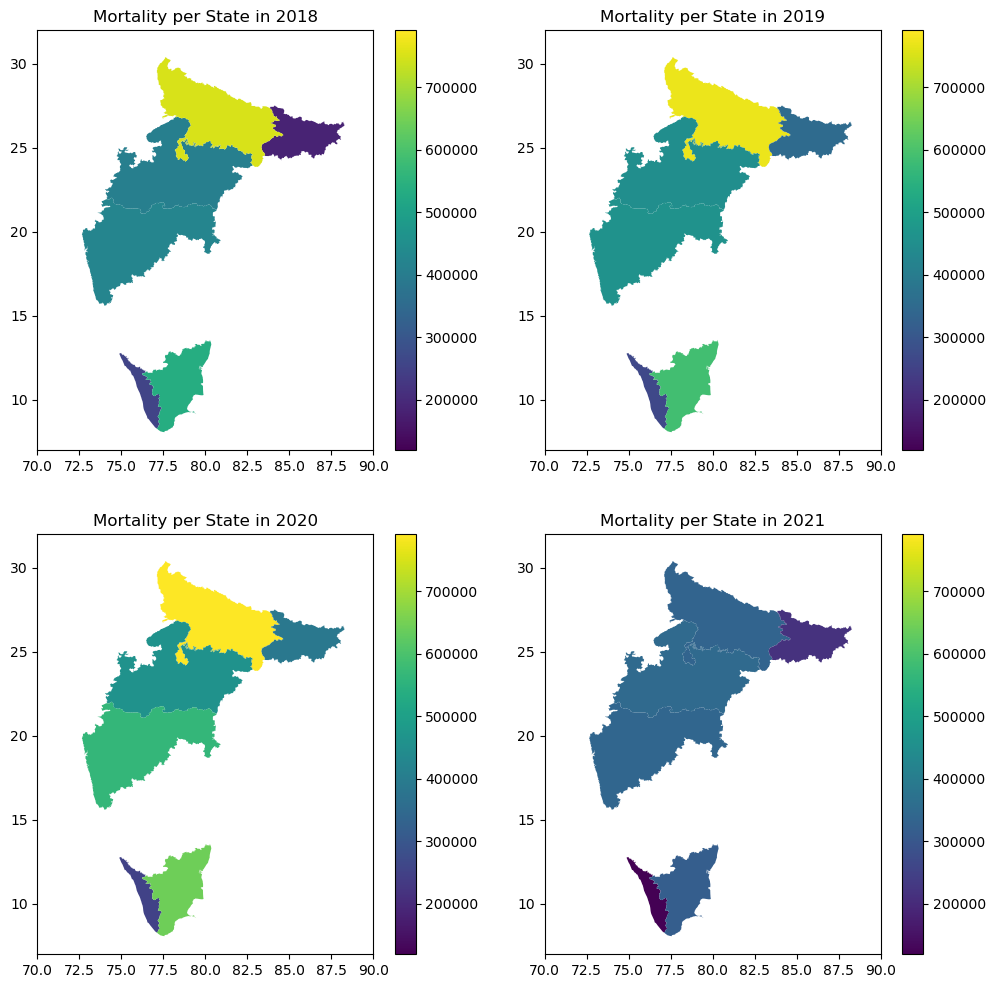

In [6]:
mortality_state["year"] = mortality_state["year"].astype(int)
mortality_state["deaths"] = mortality_state["deaths"].astype(int)

mortality_state_2018 = mortality_state[mortality_state["year"] == 2018]
mortality_state_2019 = mortality_state[mortality_state["year"] == 2019]
mortality_state_2020 = mortality_state[mortality_state["year"] == 2020]
mortality_state_2021 = mortality_state[mortality_state["year"] == 2021]

vmin = mortality_state["deaths"].min()
vmax = mortality_state["deaths"].max()

# plot choropleth
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
mortality_state_2018.plot(column="deaths", cmap="viridis", ax=ax[0][0], legend=True, vmin=vmin, vmax=vmax, linewidth=2.5)
mortality_state_2019.plot(column="deaths", cmap="viridis", ax=ax[0][1], legend=True, vmin=vmin, vmax=vmax, linewidth=2.5)
mortality_state_2020.plot(column="deaths", cmap="viridis", ax=ax[1][0], legend=True, vmin=vmin, vmax=vmax, linewidth=2.5)
mortality_state_2021.plot(column="deaths", cmap="viridis", ax=ax[1][1], legend=True, vmin=vmin, vmax=vmax, linewidth=2.5)

ax[0][0].set_title("Mortality per State in 2018")
ax[0][1].set_title("Mortality per State in 2019")
ax[1][0].set_title("Mortality per State in 2020")
ax[1][1].set_title("Mortality per State in 2021")

# 假设这是所有年份数据的共同边界
x_min, x_max, y_min, y_max = 70, 90, 7, 32

# 设置每个子图的边界
ax[0][0].set_xlim(x_min, x_max)
ax[0][0].set_ylim(y_min, y_max)
ax[0][1].set_xlim(x_min, x_max)
ax[0][1].set_ylim(y_min, y_max)
ax[1][0].set_xlim(x_min, x_max)
ax[1][0].set_ylim(y_min, y_max)
ax[1][1].set_xlim(x_min, x_max)
ax[1][1].set_ylim(y_min, y_max)

plt.show()

In [7]:
# import esda
# from splot.esda import plot_moran, lisa_cluster
# from libpysal.weights.contiguity import Queen
# from libpysal.weights import lag_spatial
# 
# # Calculate spatial weights based on the mock geometry
# w = Queen.from_dataframe(mortality_state_2018)
# w.transform = "R"
# 
# # Calculate Moran's I
# moran = esda.Moran(mortality_state_2018["deaths"], w)
# 
# # Calculate Local Moran's I (LISA)
# lisa = esda.Moran_Local(mortality_state_2018["deaths"], w)
# 
# fig, ax = plt.subplots(figsize=(10, 5))
# plot_moran(moran, zstandard=True, ax=ax)
# plt.show()

In [8]:
covid_state = gpd.read_file("./output_shpfile/covid_total_mortality_perState_perYear_shp/covid_total_mortality_perState_perYear_shp.shp")
covid_state["year"] = covid_state["year"].astype(int)
covid_state["total_case"] = covid_state["total_case"].astype(int)
covid_state["total_deat"] = covid_state["total_deat"].astype(int)
covid_state["new_cases"] = covid_state["new_cases"].astype(int)
covid_state["new_deaths"] = covid_state["new_deaths"].astype(int)

covid_state.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   lgd_sta_id  12 non-null     object  
 1   lgd_sta_na  12 non-null     object  
 2   pc11_st_id  12 non-null     object  
 3   pc11_st_na  12 non-null     object  
 4   year        12 non-null     int64   
 5   total_case  12 non-null     int64   
 6   total_deat  12 non-null     int64   
 7   new_cases   12 non-null     int64   
 8   new_deaths  12 non-null     int64   
 9   geometry    12 non-null     geometry
dtypes: geometry(1), int64(5), object(4)
memory usage: 1.1+ KB


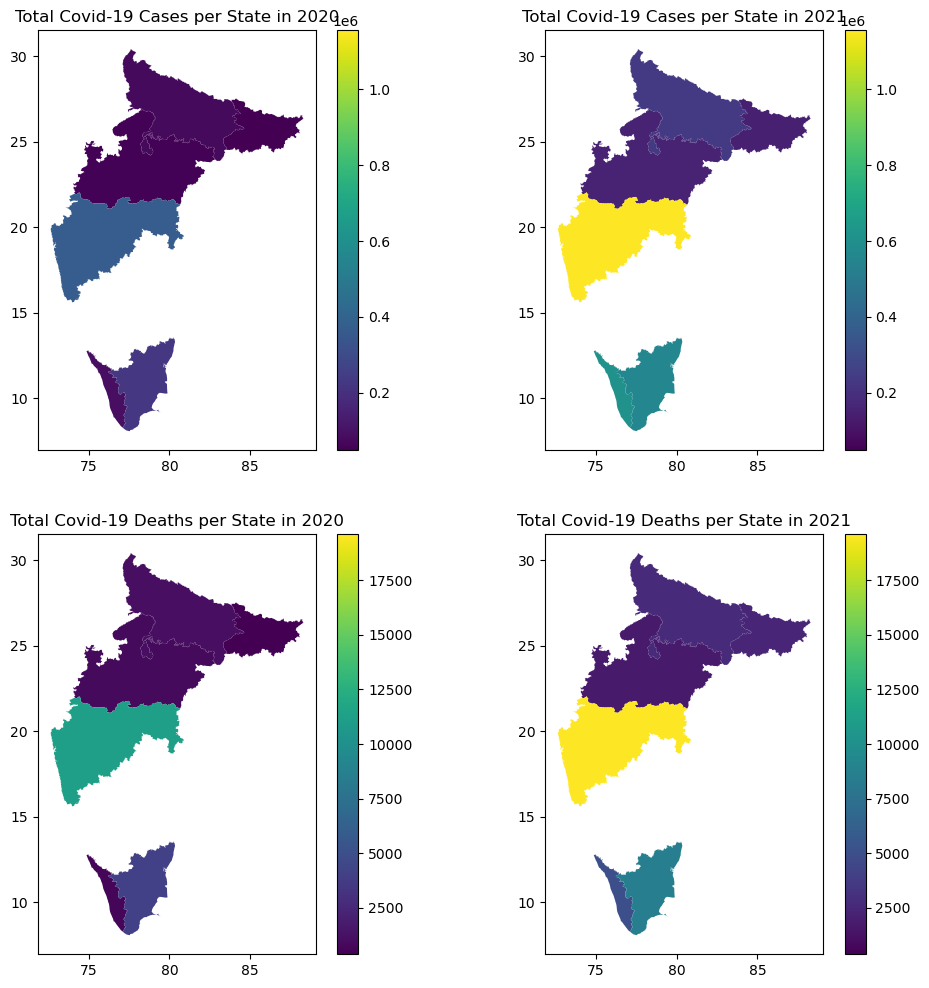

In [9]:
covid_state_2020 = covid_state[covid_state["year"] == 2020]
covid_state_2021 = covid_state[covid_state["year"] == 2021]

vmax_total_cases = covid_state["total_case"].max()
vmax_total_deaths = covid_state["total_deat"].max()
vmin_total_cases = covid_state["total_case"].min()
vmin_total_deaths = covid_state["total_deat"].min()

# plot choropleth
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
covid_state_2020.plot(column="total_case", cmap="viridis", ax=ax[0][0], legend=True, vmin=vmin_total_cases, vmax=vmax_total_cases)
covid_state_2021.plot(column="total_case", cmap="viridis", ax=ax[0][1], legend=True, vmin=vmin_total_cases, vmax=vmax_total_cases)
covid_state_2020.plot(column="total_deat", cmap="viridis", ax=ax[1][0], legend=True, vmin=vmin_total_deaths, vmax=vmax_total_deaths)
covid_state_2021.plot(column="total_deat", cmap="viridis", ax=ax[1][1], legend=True, vmin=vmin_total_deaths, vmax=vmax_total_deaths)


ax[0][0].set_title("Total Covid-19 Cases per State in 2020")
ax[0][1].set_title("Total Covid-19 Cases per State in 2021")
ax[1][0].set_title("Total Covid-19 Deaths per State in 2020")
ax[1][1].set_title("Total Covid-19 Deaths per State in 2021")

# cx.add_basemap(ax[0][0], crs=covid_state_2020.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)
# cx.add_basemap(ax[0][1], crs=covid_state_2021.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)
# cx.add_basemap(ax[1][0], crs=covid_state_2020.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)
# cx.add_basemap(ax[1][1], crs=covid_state_2021.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)

plt.show()

/var/folders/z4/15_5jblx57s2623znv512kyc0000gn/T/ipykernel_13645/1702980647.py:7: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = ps.weights.Queen.from_dataframe(covid_state_2021)


('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)')


/Users/shenqiwei/miniconda3/envs/gds/lib/python3.9/site-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
 There are 2 islands with ids: 0, 1.
  warnings.warn(message)
/Users/shenqiwei/miniconda3/envs/gds/lib/python3.9/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


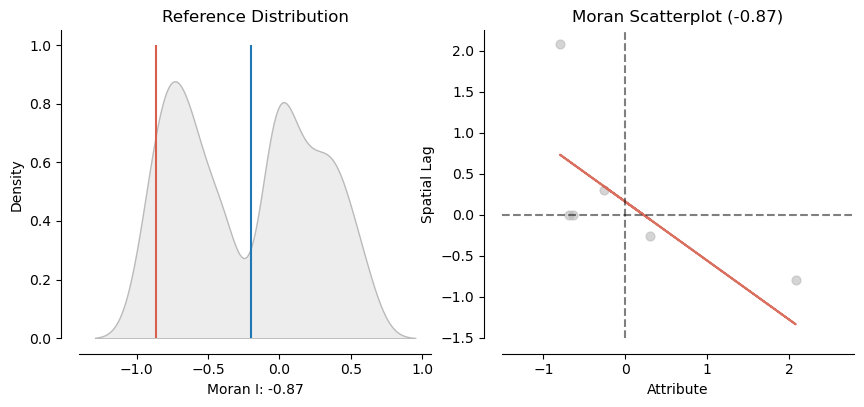

In [10]:
import geopandas as gpd
import libpysal as ps
import esda
import numpy as np
from splot.esda import plot_moran, plot_local_autocorrelation

w = ps.weights.Queen.from_dataframe(covid_state_2021)
w.transform = "r"

mi = esda.moran.Moran(covid_state_2021["total_deat"], w)

plot_moran(mi, zstandard=True, figsize=(10,4))
plt.show()

/Users/shenqiwei/miniconda3/envs/gds/lib/python3.9/site-packages/esda/moran.py:1059: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim


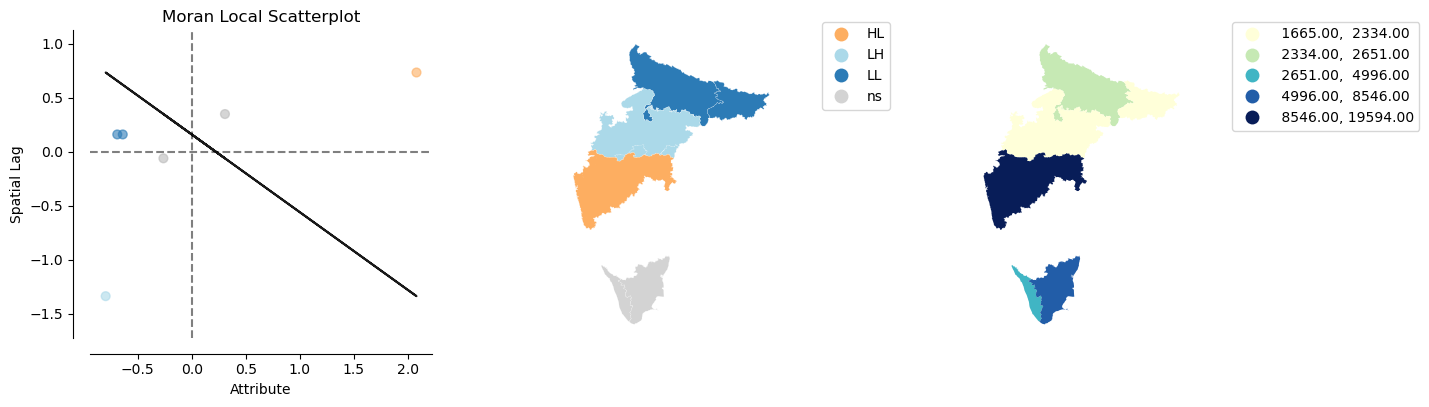

In [11]:
local_moran = esda.moran.Moran_Local(covid_state_2021["total_deat"], w)
plot_local_autocorrelation(local_moran, covid_state_2021, "total_deat")
plt.show()

/var/folders/z4/15_5jblx57s2623znv512kyc0000gn/T/ipykernel_13645/1745181807.py:1: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = ps.weights.Queen.from_dataframe(covid_state_2021)


('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 1, ' is an island (no neighbors)')


/Users/shenqiwei/miniconda3/envs/gds/lib/python3.9/site-packages/libpysal/weights/weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
 There are 2 islands with ids: 0, 1.
  warnings.warn(message)
/Users/shenqiwei/miniconda3/envs/gds/lib/python3.9/site-packages/splot/_viz_esda_mpl.py:354: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(moran.sim, shade=shade, color=color, ax=ax, **kwargs)


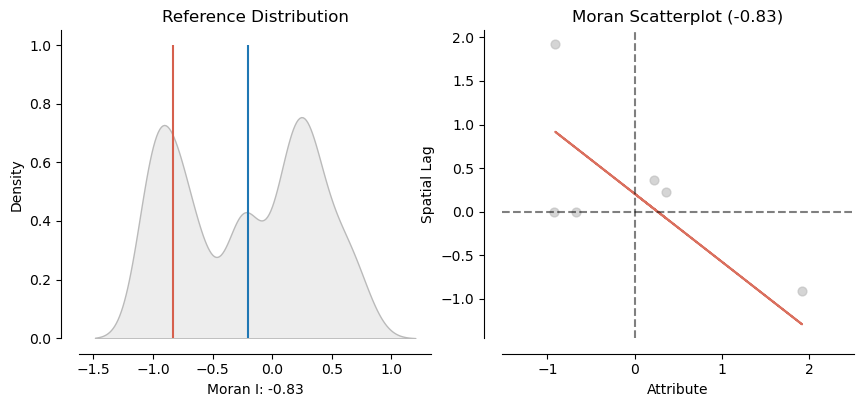

In [12]:
w = ps.weights.Queen.from_dataframe(covid_state_2021)
w.transform = "r"

mi = esda.moran.Moran(covid_state_2021["total_case"], w)

plot_moran(mi, zstandard=True, figsize=(10,4))
plt.show()

/Users/shenqiwei/miniconda3/envs/gds/lib/python3.9/site-packages/esda/moran.py:1059: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim


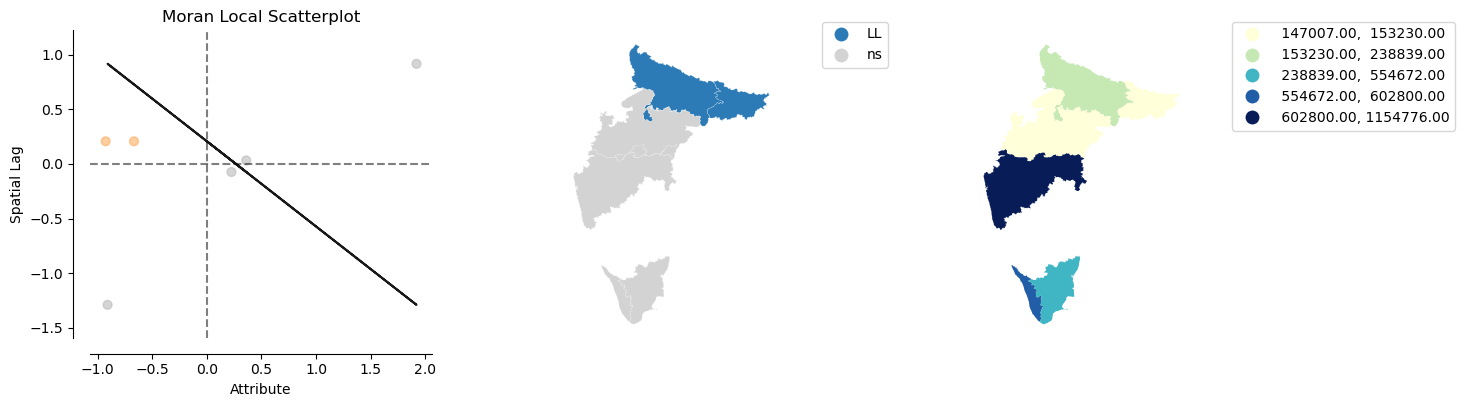

In [13]:
local_moran = esda.moran.Moran_Local(covid_state_2021["total_case"], w)
plot_local_autocorrelation(local_moran, covid_state_2021, "total_case")
plt.show()

In [14]:
hospital_beds_state = gpd.read_file("./output_shpfile/hospital_bed_state_shp/hospital_bed_state_shp.shp")
hospital_beds_state["hospit_bed"] = hospital_beds_state["hospit_bed"].astype(int)
hospital_beds_state.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   lgd_sta_id  6 non-null      object  
 1   lgd_sta_na  6 non-null      object  
 2   pc11_st_id  6 non-null      object  
 3   pc11_st_na  6 non-null      object  
 4   hospit_bed  6 non-null      int64   
 5   bed_1000    6 non-null      float64 
 6   geometry    6 non-null      geometry
dtypes: float64(1), geometry(1), int64(1), object(4)
memory usage: 464.0+ bytes


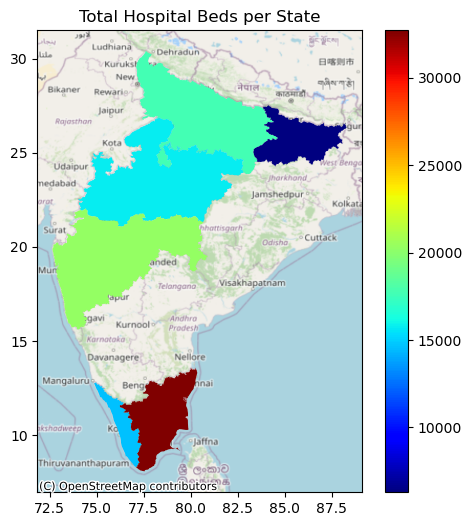

In [15]:
# plot choropleth
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
hospital_beds_state.plot(column="hospit_bed", cmap="jet", ax=ax, legend=True)

ax.set_title("Total Hospital Beds per State")

cx.add_basemap(ax, crs=covid_state_2020.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)

plt.show()

In [18]:
# Merge them all
merged = mortality_state.merge(covid_state, on=["lgd_sta_id", "year"], how="left")
merged = merged.merge(hospital_beds_state, on="lgd_sta_id", how="left")

merged

,lgd_sta_id,lgd_sta_na_x,pc11_st_id_x,pc11_st_na_x,deaths,year,geometry_x,lgd_sta_na_y,pc11_st_id_y,pc11_st_na_y,...,total_deat,new_cases,new_deaths,geometry_y,lgd_sta_na,pc11_st_id,pc11_st_na,hospit_bed,bed_1000,geometry
0,09,uttar pradesh,09,uttar pradesh,771383,2019,"MULTIPOLYGON (((78.58008 25.18957, 78.58099 25...",NaN,NaN,NaN,...,NaN,NaN,NaN,None,uttar pradesh,09,uttar pradesh,17651,0.089690,"MULTIPOLYGON (((78.58008 25.18957, 78.58099 25..."
1,09,uttar pradesh,09,uttar pradesh,791485,2020,"MULTIPOLYGON (((78.58008 25.18957, 78.58099 25...",uttar pradesh,09,uttar pradesh,...,1111.0,0.0,0.0,"MULTIPOLYGON (((78.58008 25.18957, 78.58099 25...",uttar pradesh,09,uttar pradesh,17651,0.089690,"MULTIPOLYGON (((78.58008 25.18957, 78.58099 25..."
2,09,uttar pradesh,09,uttar pradesh,333878,2021,"MULTIPOLYGON (((78.58008 25.18957, 78.58099 25...",uttar pradesh,09,uttar pradesh,...,2651.0,160582.0,1540.0,"MULTIPOLYGON (((78.58008 25.18957, 78.58099 25...",uttar pradesh,09,uttar pradesh,17651,0.089690,"MULTIPOLYGON (((78.58008 25.18957, 78.58099 25..."
3,10,bihar,10,bihar,182921,2018,"MULTIPOLYGON (((84.51003 24.25944, 84.50918 24...",NaN,NaN,NaN,...,NaN,NaN,NaN,None,bihar,10,bihar,6291,0.060842,"MULTIPOLYGON (((84.51003 24.25944, 84.50918 24..."
4,10,bihar,10,bihar,351274,2019,"MULTIPOLYGON (((84.51003 24.25944, 84.50918 24...",NaN,NaN,NaN,...,NaN,NaN,NaN,None,bihar,10,bihar,6291,0.060842,"MULTIPOLYGON (((84.51003 24.25944, 84.50918 24..."
5,10,bihar,10,bihar,387429,2020,"MULTIPOLYGON (((84.51003 24.25944, 84.50918 24...",bihar,10,bihar,...,380.0,0.0,0.0,"MULTIPOLYGON (((84.51003 24.25944, 84.50918 24...",bihar,10,bihar,6291,0.060842,"MULTIPOLYGON (((84.51003 24.25944, 84.50918 24..."
6,10,bihar,10,bihar,215746,2021,"MULTIPOLYGON (((84.51003 24.25944, 84.50918 24...",bihar,10,bihar,...,2334.0,98097.0,1954.0,"MULTIPOLYGON (((84.51003 24.25944, 84.50918 24...",bihar,10,bihar,6291,0.060842,"MULTIPOLYGON (((84.51003 24.25944, 84.50918 24..."
7,23,madhya pradesh,23,madhya pradesh,407123,2018,"MULTIPOLYGON (((76.78783 21.54013, 76.78554 21...",NaN,NaN,NaN,...,NaN,NaN,NaN,None,madhya pradesh,23,madhya pradesh,15769,0.230666,"MULTIPOLYGON (((76.78783 21.54013, 76.78554 21..."
8,23,madhya pradesh,23,madhya pradesh,449740,2019,"MULTIPOLYGON (((76.78783 21.54013, 76.78554 21...",NaN,NaN,NaN,...,NaN,NaN,NaN,None,madhya pradesh,23,madhya pradesh,15769,0.230666,"MULTIPOLYGON (((76.78783 21.54013, 76.78554 21..."
9,23,madhya pradesh,23,madhya pradesh,460691,2020,"MULTIPOLYGON (((76.78783 21.54013, 76.78554 21...",madhya pradesh,23,madhya pradesh,...,873.0,0.0,0.0,"MULTIPOLYGON (((76.78783 21.54013, 76.78554 21...",madhya pradesh,23,madhya pradesh,15769,0.230666,"MULTIPOLYGON (((76.78783 21.54013, 76.78554 21..."


In [19]:
merged = merged[["lgd_sta_id", "lgd_sta_na", "pc11_st_id", "pc11_st_na", "year", "deaths", "total_case", "total_deat", "bed_1000", "geometry"]]
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   lgd_sta_id  24 non-null     object  
 1   lgd_sta_na  24 non-null     object  
 2   pc11_st_id  24 non-null     object  
 3   pc11_st_na  24 non-null     object  
 4   year        24 non-null     int64   
 5   deaths      24 non-null     int64   
 6   total_case  12 non-null     float64 
 7   total_deat  12 non-null     float64 
 8   bed_1000    24 non-null     float64 
 9   geometry    24 non-null     geometry
dtypes: float64(3), geometry(1), int64(2), object(4)
memory usage: 2.0+ KB


In [20]:
merged = gpd.GeoDataFrame(merged, geometry="geometry")
os.mkdir("./Final_output_shpfile")
merged.to_file("./Final_output_shpfile/Final_output_shpfile.shp", driver="ESRI Shapefile")

In [3]:
all_data = gpd.read_file("./Final_output_shpfile/Final_output_shpfile.shp")

all_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   lgd_sta_id  24 non-null     object  
 1   lgd_sta_na  24 non-null     object  
 2   pc11_st_id  24 non-null     object  
 3   pc11_st_na  24 non-null     object  
 4   year        24 non-null     int64   
 5   deaths      24 non-null     int64   
 6   total_case  12 non-null     float64 
 7   total_deat  12 non-null     float64 
 8   bed_1000    24 non-null     float64 
 9   geometry    24 non-null     geometry
dtypes: float64(3), geometry(1), int64(2), object(4)
memory usage: 2.0+ KB


In [4]:
all_data = all_data[all_data["year"].isin([2020, 2021])]

all_data

,lgd_sta_id,lgd_sta_na,pc11_st_id,pc11_st_na,year,deaths,total_case,total_deat,bed_1000,geometry
1,09,uttar pradesh,09,uttar pradesh,2020,791485,78257.0,1111.0,0.089690,"MULTIPOLYGON (((78.58008 25.18957, 78.58099 25..."
2,09,uttar pradesh,09,uttar pradesh,2021,333878,238839.0,2651.0,0.089690,"MULTIPOLYGON (((78.58008 25.18957, 78.58099 25..."
5,10,bihar,10,bihar,2020,387429,48910.0,380.0,0.060842,"MULTIPOLYGON (((84.51003 24.25944, 84.50918 24..."
6,10,bihar,10,bihar,2021,215746,147007.0,2334.0,0.060842,"MULTIPOLYGON (((84.51003 24.25944, 84.50918 24..."
9,23,madhya pradesh,23,madhya pradesh,2020,460691,54918.0,873.0,0.230666,"MULTIPOLYGON (((76.78783 21.54013, 76.78554 21..."
10,23,madhya pradesh,23,madhya pradesh,2021,348595,153230.0,1665.0,0.230666,"MULTIPOLYGON (((76.78783 21.54013, 76.78554 21..."
13,27,maharashtra,27,maharashtra,2020,565185,372655.0,11116.0,0.202838,"MULTIPOLYGON (((73.08356 17.81855, 73.08470 17..."
14,27,maharashtra,27,maharashtra,2021,338123,1154776.0,19594.0,0.202838,"MULTIPOLYGON (((73.08356 17.81855, 73.08470 17..."
17,32,kerala,32,kerala,2020,252421,90820.0,653.0,0.438364,"POLYGON ((76.83494 10.33028, 76.83446 10.32504..."
18,32,kerala,32,kerala,2021,119280,602800.0,4996.0,0.438364,"POLYGON ((76.83494 10.33028, 76.83446 10.32504..."


In [13]:
all_data["hci"] = 0.4 * (all_data["total_deat"] / all_data["total_case"]) + 0.2 * (1 / all_data["bed_1000"]) + 0.4 * (all_data["deaths"] / all_data["total_case"])

all_data

,lgd_sta_id,lgd_sta_na,pc11_st_id,pc11_st_na,year,deaths,total_case,total_deat,bed_1000,geometry,hci
1,09,uttar pradesh,09,uttar pradesh,2020,791485,78257.0,1111.0,0.089690,"MULTIPOLYGON (((78.58008 25.18957, 78.58099 25...",6.281146
2,09,uttar pradesh,09,uttar pradesh,2021,333878,238839.0,2651.0,0.089690,"MULTIPOLYGON (((78.58008 25.18957, 78.58099 25...",2.793507
5,10,bihar,10,bihar,2020,387429,48910.0,380.0,0.060842,"MULTIPOLYGON (((84.51003 24.25944, 84.50918 24...",6.458805
6,10,bihar,10,bihar,2021,215746,147007.0,2334.0,0.060842,"MULTIPOLYGON (((84.51003 24.25944, 84.50918 24...",3.880578
9,23,madhya pradesh,23,madhya pradesh,2020,460691,54918.0,873.0,0.230666,"MULTIPOLYGON (((76.78783 21.54013, 76.78554 21...",4.228897
10,23,madhya pradesh,23,madhya pradesh,2021,348595,153230.0,1665.0,0.230666,"MULTIPOLYGON (((76.78783 21.54013, 76.78554 21...",1.781394
13,27,maharashtra,27,maharashtra,2020,565185,372655.0,11116.0,0.202838,"MULTIPOLYGON (((73.08356 17.81855, 73.08470 17...",1.604598
14,27,maharashtra,27,maharashtra,2021,338123,1154776.0,19594.0,0.202838,"MULTIPOLYGON (((73.08356 17.81855, 73.08470 17...",1.109917
17,32,kerala,32,kerala,2020,252421,90820.0,653.0,0.438364,"POLYGON ((76.83494 10.33028, 76.83446 10.32504...",1.570860
18,32,kerala,32,kerala,2021,119280,602800.0,4996.0,0.438364,"POLYGON ((76.83494 10.33028, 76.83446 10.32504...",0.538708


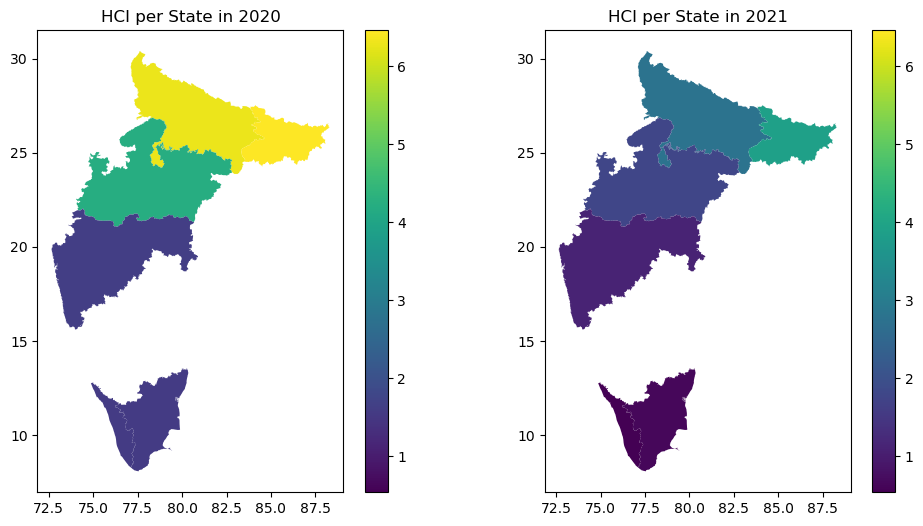

In [12]:
all_data_2020 = all_data[all_data["year"] == 2020]
all_data_2021 = all_data[all_data["year"] == 2021]

vmax_hci = all_data["hci"].max()
vmin_hci = all_data["hci"].min()

# plot choropleth
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
all_data_2020.plot(column="hci", cmap="viridis", ax=ax[0], legend=True, vmin=vmin_hci, vmax=vmax_hci)
all_data_2021.plot(column="hci", cmap="viridis", ax=ax[1], legend=True, vmin=vmin_hci, vmax=vmax_hci)

ax[0].set_title("HCI per State in 2020")
ax[1].set_title("HCI per State in 2021")

plt.show()